In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1.----required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 2.-----------------Loading Dataset------------------
df = pd.read_csv("/content/drive/MyDrive/dataset/newfraud_data.csv")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1999995,179,CASH_OUT,137049.26,C1448205341,0.0,0.00,C953599385,1302616.22,1439665.48,0,0
1999996,179,CASH_OUT,53575.84,C1304226640,0.0,0.00,C789411283,2694904.53,2748480.36,0,0
1999997,179,CASH_OUT,218142.52,C332476133,0.0,0.00,C1161451535,461142.84,679285.35,0,0
1999998,179,CASH_OUT,12409.19,C6884039,0.0,0.00,C1199213870,2757856.94,2770266.14,0,0


In [ ]:
# 3.-----------------EDA------------------

In [ ]:
print(df.shape)

(2000000, 11)


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000.0
mean,8.484592e+01,1.611882e+05,8.574199e+05,8.786843e+05,9.960116e+05,1.114418e+06,1.018000e-03,0.0
std,6.277502e+01,2.710108e+05,2.928641e+06,2.964900e+06,2.304238e+06,2.399416e+06,3.188988e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.000000e+01,1.304080e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.500000e+01,7.805394e+04,1.499200e+04,0.000000e+00,1.370054e+05,2.271597e+05,0.000000e+00,0.0
75%,1.430000e+02,2.163328e+05,1.205681e+05,1.618344e+05,9.472718e+05,1.150549e+06,0.000000e+00,0.0
max,1.790000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.228378e+07,1.000000e+00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 167.8+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#checking multi-collinearity
# 4.-----------------Encoding------------------

In [ ]:
dfc = df.copy()
dfc['type']=dfc['type'].map({'PAYMENT':1 ,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})

# for machine readable > object to int

In [ ]:
dfc.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#dfc = dfc.drop(columns = ['nameOrig','nameDest','isFraud','isFlaggedFraud'])

In [ ]:
# 5.-----------------Visualisation------------------

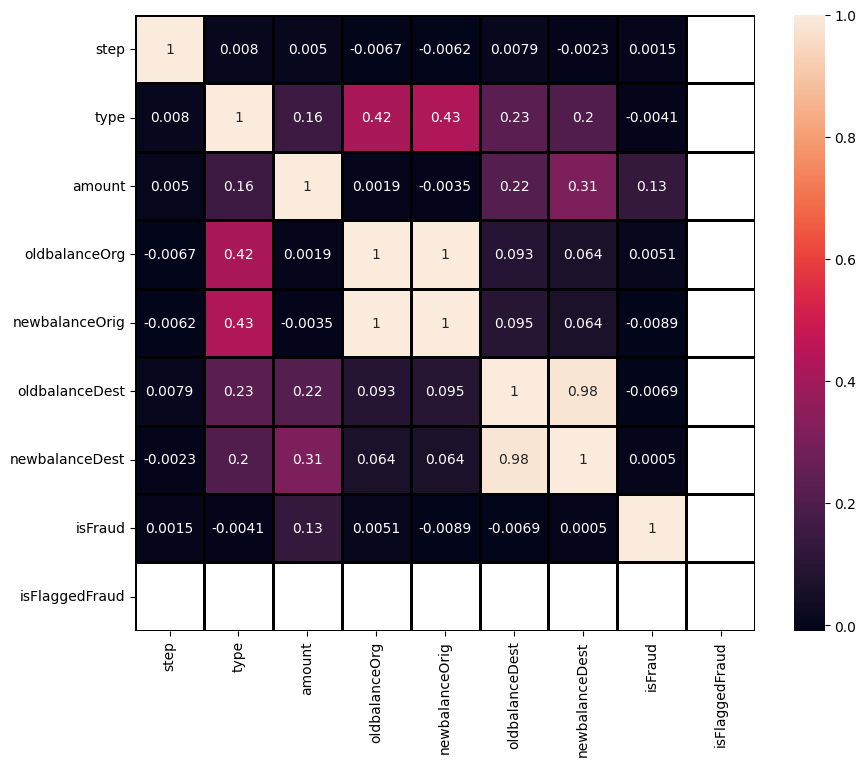

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(dfc.corr(), annot = True, linecolor = 'black', linewidths = 1)
plt.show()

In [ ]:
# oldbalanceOrg and newbalanceOrig
# newbalanceOrig and oldbalanceOrg
#   having perfect Correlation

# oldbalanceDest and newbalanceDest
# newbalanceDest and oldbalanceDest
#   having strong Correlation

# oldbalanceOrig and oldbalanceDest
# newbalanceDest and oldbalanceDest
# oldbalanceDest and oldbalanceOrig
# oldbalanceDest and newbalanceOrig
#   having Correlation but less

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Detecting Multicollinearity with VIF

vif_feature = dfc[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_feature.columns
vif_data["VIF"] = [variance_inflation_factor(vif_feature.values, i) for i in range(len(vif_feature.columns))]

print(vif_data)

          feature         VIF
0            step    2.088115
1            type    3.274969
2          amount    2.242355
3   oldbalanceOrg  674.867105
4  newbalanceOrig  686.551479
5  oldbalanceDest   58.179175
6  newbalanceDest   62.102924


In [ ]:
#  This VIF indicating that these two variables i.e., oldbalanceOrg and newbalanceOrig are highly correlated

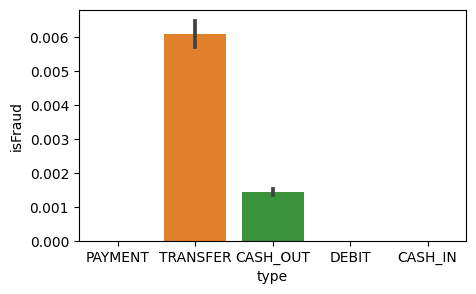

In [ ]:
plt.figure(figsize = (5,3))
sns.barplot(x = df['type'], y = dfc['isFraud'])
plt.show()

In [ ]:
df.loc[df.isFraud == 1].type.values
#df.loc[df.isFraud == 1].type.value_counts()

# is seams fraud has done by 'TRANSFER' and 'CASH_OUT' only.

array(['TRANSFER', 'CASH_OUT', 'TRANSFER', ..., 'CASH_OUT', 'TRANSFER',
       'CASH_OUT'], dtype=object)

In [ ]:
df_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
print('No. of Fraud by Transfer - {}'.format(len(df_transfer)))

No. of Fraud by Transfer - 1011


In [ ]:
df_cashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print('No. of Fraud by CashOut - {}'.format(len(df_cashout)))

No. of Fraud by CashOut - 1025


In [ ]:
# Thus the fraud had done by two 'Type' of Transaction
# 1. by 'TRANSFER'
# 2. by 'CASH_OUT'

In [ ]:
# As checked by multi-collinearity with VIF, oldbalanceOrg and newbalanceOrig
# are highly correlated which had helped to select the model.

In [ ]:
#!pip install lazypredict

#import lazypredict
#from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 167.8+ MB


In [ ]:
# 6.-----------------Split-Train and Test------------------

In [ ]:
x = dfc.drop(columns = ['nameOrig','nameDest','isFraud','isFlaggedFraud'])
y = dfc['isFraud']

In [ ]:
x.shape,y.shape

((2000000, 7), (2000000,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1400000, 7) (600000, 7)
(1400000,) (600000,)


In [ ]:
#clf = LazyClassifier(ignore_warnings=True)
#models,predictions = clf.fit(x_train, x_test, y_train, y_test)

#models()                  # checking whether which classifier has best score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 7.-----------------Model Training and Selection------------------

In [ ]:
model_LR = LogisticRegression(random_state = 3)
model_LR.fit(x_train, y_train)
prediction = model_LR.predict(x_test)
print(metrics.accuracy_score(prediction, y_test))

0.9990433333333333


In [ ]:
model_DTC = DecisionTreeClassifier(splitter = 'best', random_state = 3)
model_DTC.fit(x_train, y_train)
prediction = model_DTC.predict(x_test)
print(metrics.accuracy_score(prediction, y_test))

0.999615


In [ ]:
model_KNC = KNeighborsClassifier()
model_KNC.fit(x_train, y_train)
prediction = model_KNC.predict(x_test)
print(metrics.accuracy_score(prediction, y_test))

0.9994466666666667


In [ ]:
model_AdaC = AdaBoostClassifier()
model_AdaC.fit(x_train, y_train)
prediction = model_AdaC.predict(x_test)
print(metrics.accuracy_score(prediction, y_test))

0.999435


In [ ]:
# The best-performed model is DecisionTreeClassifier. Let’s plot the Confusion Matrix for the same model.

[[599269    107]
 [   124    500]]


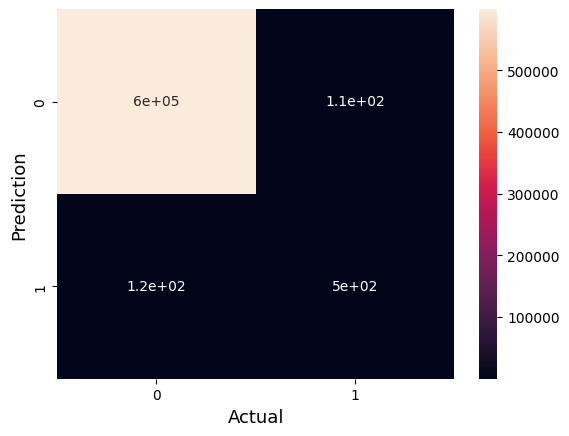

In [ ]:
from sklearn.metrics import confusion_matrix

model_cm = model_DTC.predict(x_test)

cm = confusion_matrix(y_test, model_cm)
print(cm)

sns.heatmap(cm, annot = True, cmap = 'rocket')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

In [ ]:
# In this confusion matrix, it shows that the large no. of data
# is occuring in the True Positive (TP) data point.
# Hence, the prediction data and actual data are accurate instances (TP = 599305).

# 8.-----------------Conclusion------------------

# Predictive models produce good accuracy score
# (i.e., overall about 0.99 accuracy)
# and are capable of detection of fraud transaction.